# TAURUS 2018
# Introduction to Python Day 4
# Astropy, FITS files & Imaging

Congrats on making it to the last day of this seminar! You've learned a lot in three days, so now let's put it all together to do some astronomy! 

A package I highly recommend you become familiar with is astropy. This includes a library of astronomical constants and unit conversions, coordinate conversions, cosmological calculations, image processing, and much more!

## Pip install

This leads us to a great opportunity to show you how to install additional packages to your Python distribution. If it is a large, well-known package (i.e., not developed by one person on github), you can usually install things using pip. Go ahead and open a terminal session. Once you are in bash and your Python 3.5 environment, type

    pip install astropy
    
This will automatically download and install astropy from the Internet! Note that this needs to be done outside of a Jupyter notebook (it'll throw an error if you try it). 

(Depending on the distribution of Python you have installed on your computer, it may or may not have come with astropy preloaded. If it's already there, then pip install will stop and say 'requirement already satisfied.')


## Astropy: Units & Constants

The most basic use for Astropy is units and constants. I highly recommend using the constants within Astropy so that a) you're not constantly Googling them, and b) they are precise and accurate. The constants are loaded with units as well, making conversions between them quite easy.

One quick disclaimer is that the solar mass constant is slightly out of date, so researchers doing high-precision stellar work may need to keep that in mind.

Load up the constants as well as our other usual packages:


In [1]:
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt

To call a constant, simply type const.(constant) where the symbols are generally the same as what's in your textbooks. For example, G is Newton's gravitational constant:

In [2]:
G = const.G

print(G)
const.G

  Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014


<<class 'astropy.constants.codata2014.CODATA2014'> name='Gravitational constant' value=6.67408e-11 uncertainty=3.1e-15 unit='m3 / (kg s2)' reference='CODATA 2014'>

Calling the constant will give you a bunch of information about it, including its name, value, uncertainty, and SI unit. Astropy is not in cgs units, but it's easy to convert by adding .cgs to the end of the unit:

In [3]:
G_cgs = const.G.cgs

print(G_cgs)

6.674079999999999e-08 cm3 / (g s2)


You can also convert to specific units as you choose, by doing .to('new units'). For example:

In [4]:
G_weirdunits = const.G.to('kpc3 / (Msun Gyr2)')

print(G_weirdunits)

4.498502151575286e-06 kpc3 / (Gyr2 solMass)


This can be very helpful when using normalized equations. Note that Python will have trouble with certain units: for example, it doesn't know it can cancel out Hz and seconds. Also, if there are units inside a log expression, it will complain. So if you already know your units work out and you just want the value, you can type .value!

These can also be combined, like G.cgs.value.

In [5]:
G_value = const.G.value

print(G_value)

6.67408e-11


If you do want to keep track of units, you can assign them by multiplying a float by the unit.

In [6]:
from astropy import units as u

R = 1.0 * u.kpc

print(R)

1.0 kpc


### Question 1: Using astropy, call the speed of light and convert it to kilometers per Megayear. 

In [7]:
# solution here

c = const.c
c_weirdunits = c.to('km / Myr')
print(c_weirdunits)

9.4607304725808e+18 km / Myr


## Astropy: Cosmological Calculations

There's a good chance you will need to calculate things like luminosity distance, angular diameter distance, or age of the Universe, especially if you are doing high-redshift work. To do cosmology in astropy, simply set the cosmological parameters, like so:

In [8]:
from astropy.cosmology import FlatLambdaCDM

cosmo=FlatLambdaCDM(H0=70., Om0=0.3)

This sets the Hubble constant to 70 km/s / Mpc and the matter density factor, $\Omega_M$, to 0.3. The cosmological calculations are attributes of FlatLambdaCDM which we've set to "cosmo." Here are a couple of examples:

In [9]:
LD4 = cosmo.luminosity_distance(4)
ADD4 = cosmo.angular_diameter_distance(4)

print(LD4, ADD4)

35851.83207231648 Mpc 1434.073282892659 Mpc


### Question 2: What is the age of the Universe at redshift 1, in Myr and Gyr?

In [10]:
# solution here

age_z4 = cosmo.age(4)
print(age_z4)

print(age_z4.to('Myr'))




1.51600160327725 Gyr
1516.00160327725 Myr


### Exercise

Let's practice some more plotting skills, now incorporating units. 

    1. Write a function that takes an array of frequencies and spits out the Planck distribution. That's this equation:

$$ B(\nu, T) = \frac{2h\nu^3/c^2}{e^{\frac{h\nu}{k_B T}} - 1} $$

    This requires you to use the Planck constant, the Boltzmann constant, and the speed of light from astropy. Make sure they are all in cgs. 
    
    2. Plot your function in log-log space for 25, 50, and 300 K. Make sure everything is labelled. 

(1e-36, 1e-07)

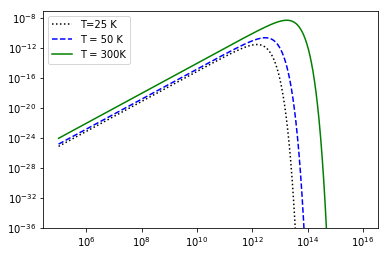

In [11]:
# solution here

h = const.h.cgs.value
kB = const.k_B.cgs.value
c = const.c.cgs.value

def planck(nu, T):
    num = 2 * h * nu**3 / c**2
    denom = np.exp( (h * nu) / (kB * T)) - 1
    return num / denom

nu_array = np.logspace(5, 16, 1000)
T1 = 25.
T2 = 50.
T3  = 300.

wavelength = const.c.value / nu_array

B1 = planck(nu_array, T1)
B2 = planck(nu_array, T2)
B3 = planck(nu_array, T3)

plt.loglog(nu_array, B1, 'k:', label='T=25 K')
plt.loglog(nu_array, B2, '--b', label='T = 50 K')
plt.loglog(nu_array, B3, '-g', label='T = 300K')
plt.legend()

plt.ylim(1e-36, 1e-7)

## FITS Files

Astropy can read in FITS files, which is a typical format of astronomical images. FITS stands for Flexible Image Transport System, and most basic image viewers can't do anything with them since they aren't files like JPGs or GIFs. There are a few programs that will read them, including CASA if you're a radio astronomer, or DS9.

FITS is a useful format for astronomical data because it contains a lot of behind the scenes information. The header in particular will usually give you information about the telescope the data is from, the reference position in the sky for the data, the pixel scale, the size of the image, and more! First, let's import the package.

In [12]:
from astropy.io import fits

Let's step through how to work with the files I've given you to work with. First, open the file using fits.open(). To get some basic information about the file, type fitsfile.info().

In [13]:
hdulist = fits.open('f001a066.fits') #B filter image of Andromeda
hdulist.info()

Filename: f001a066.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (7055, 7055)   int16   


The actual information of interest is contained in the header. FITS files can contain many images in the same file, but this is a 2D image, so it only contains one slice. We will still have to specify that it's the first slice, so we call "hdulist[0]". Note that you can do a shortcut in the first place and place the [0] at the end of fits.open(). 

Let's read out the header:

In [14]:
hdulist[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T /FITS header                                     
BITPIX  =                   16 /No.Bits per pixel                               
NAXIS   =                    2 /No.dimensions                                   
NAXIS1  =                 7055 /Length X axis                                   
NAXIS2  =                 7055 /Length Y axis                                   
EXTEND  =                    T /                                                
DATE    = '09/07/04          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'SJ01467           ' /Observatory plate label                         
PLATEID = 'A066              ' /GSSS Plate ID                                   
REGION  = 'XJ295             ' /GSSS Region Name                                
DATE-OBS= '1987/09/20        ' /UT date of Observation                          
UT      = '#################

You can also call specific lines of the header. The header is written as an array so you can index it the same way as always. You can also call the line by its name as a string, such as hdulist['SKEW']. 

### Question 3: What is the pixel scale on the x axis? This is typically called CDELT1. What information is contained on the second line of the header?

In [15]:
# solution here

print(hdulist[0].header['CDELT1'])
print(hdulist[0].header[1])

-0.00028324823369599
16


Now we know a little bit about what we're working with. You'll have to check headers pretty frequently so I'd commit this step to memory!

Now we can access the data contained in the FITS file. The values are typically units of brightness and the positions in the matrix are the pixel values, with (0, 0) in the bottom left. You can manipulate this matrix like you would with any array. 

In [16]:
M51B = hdulist[0].data

### Question 4: What are the size and shape of this matrix? What is the average and standard deviation of the flux?

In [17]:
# solution here

size = np.size(M51B)
shape = np.ndim(M51B)

average = np.average(M51B)
std = np.std(M51B)

print(size, shape, average, std)

49773025 2 10988.35800494344 3750.2322725382974


If you load in data this way, you will most likely be manipulating the values numerically for some reason. Some common reasons for this might be to change the units of the flux, mask out a bright star or quasar, rotate the image, or something like that. 

If the shape of the array gets in the way of some calculation or manipulation you're doing, you can turn it into a 1D array by doing data.flatten(), and you can reshape it later. 

### Question 5: Flatten your array and produce a normalized histogram of the flux values.

/Users/smf2735/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([2.99026994e-08, 8.81145990e-07, 2.61671571e-06, 1.00060924e-05,
        1.06346393e-05, 5.85174842e-06, 5.27828547e-06, 5.27133441e-06,
        5.60580528e-06, 3.39082840e-05, 3.07478342e-04, 3.53511483e-04,
        1.91661548e-04, 1.43000479e-04, 1.05904115e-04, 7.14649268e-05,
        4.97608787e-05, 3.92006683e-05, 3.57986133e-05, 3.61573473e-05,
        3.50878012e-05, 3.00377533e-05, 2.29848148e-05, 1.78845356e-05,
        1.48136399e-05, 1.24636222e-05, 9.80405246e-06, 7.62197511e-06,
        6.51062424e-06, 5.98814670e-06, 5.22444750e-06, 4.16437713e-06,
        3.43943340e-06, 3.01345109e-06, 2.77429507e-06, 2.55054943e-06,
        2.40615087e-06, 2.29417969e-06, 2.28165465e-06, 2.61124011e-06,
        3.79633130e-06, 5.52137606e-06, 6.02454143e-06, 4.55140725e-06,
        2.49271132e-06, 1.06702143e-06, 3.78144552e-07, 1.11020329e-07,
        2.93125145e-08, 9.34459355e-09]),
 array([ 2129.  ,  2741.76,  3354.52,  3967.28,  4580.04,  5192.8 ,
         5805.56,  6418.32

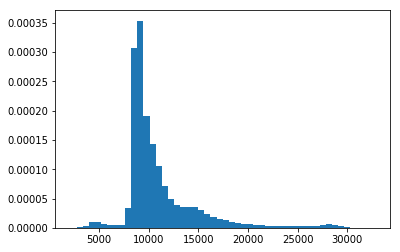

In [18]:
# solution here

flat = M51B.flatten()

plt.hist(flat, bins=50, normed=True)

## Aplpy

My favorite way to work with images in Python is the package aplpy (pronounced Apple Pie) which allows you to make lovely publication-worthy image plots. Go ahead and pip install this now, and import it here.

In [19]:
import aplpy

/Users/smf2735/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


To use aplpy, you don't need to go through the process of opening the FITS file and grabbing the data as in astropy. You will just open the file using FITSFigure. Let's check out this mysterious image:

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


INFO: Auto-setting vmin to  1.546e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.185e+04 [aplpy.core]


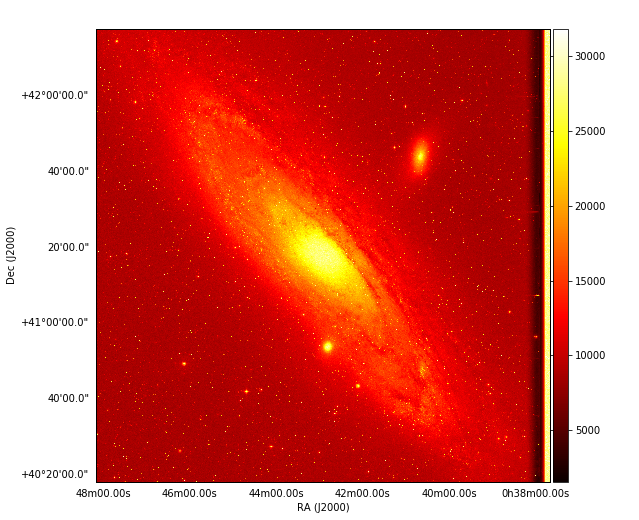

In [20]:
galaxy = aplpy.FITSFigure('f001a066.fits')
galaxy.show_colorscale(cmap='hot')
galaxy.show_colorbar()

plt.show()

This is the tutorial included in the Aplpy documentation that nicely shows how you can overplot contours and include multiple layers. Take some time to play with this:

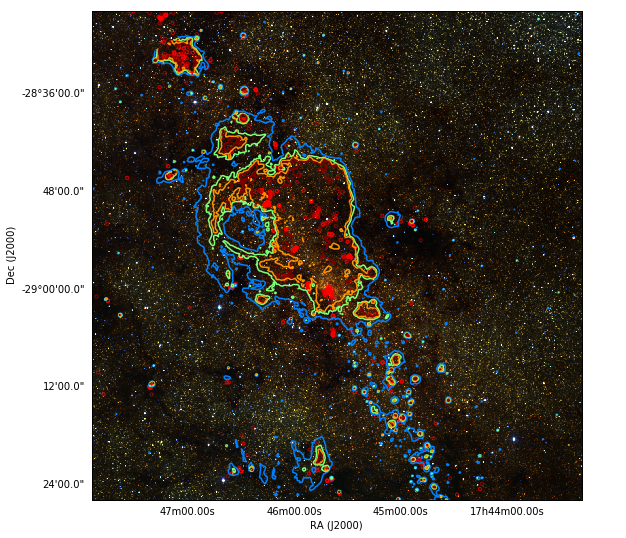

In [21]:
galaxy = aplpy.FITSFigure('tutorial/fits/2MASS_k.fits')

galaxy.show_rgb('tutorial/graphics/2MASS_arcsinh_color.png')

galaxy.show_contour('tutorial/fits/mips_24micron.fits')

data = np.loadtxt('tutorial/data/yso_wcs_only.txt')
ra, dec = data[:, 0], data[:, 1]

galaxy.show_markers(ra, dec, layer='marker_set_1', edgecolor='red', facecolor='none', 
                    marker='o', s=10, alpha=0.5)

plt.show()

### Exercise

Let's put everything together now! Here's a link to the full documentation for FITSFigure, which will tell you all of the customizable options: http://aplpy.readthedocs.io/en/stable/api/aplpy.FITSFigure.html. Let's create a nice plot of M51 with a background optical image and X-ray contours overplotted.

The data came from here if you're interested: http://chandra.harvard.edu/photo/openFITS/multiwavelength_data.html

1. Using astropy, open the X-ray data (m51_xray.fits). Flatten the data array and find its standard deviation, and call it sigma.
2. Plot a colorscale image of the optical data. Choose a colormap that is visually appealing (list of them here: https://matplotlib.org/examples/color/colormaps_reference.html ). Show the colorbar. 
3. Plot the X-ray data as contours above the optical image. Make the contours red with 80% opacity and dotted lines. Make the levels go from 1$\sigma$ to 10$\sigma$ in steps of $\sigma$. (It might be easier to define the levels array before show_contours, and set levels=levels.)


invalid keyvalue. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -2.493e+03 [aplpy.core]
INFO: Auto-setting vmax to  6.499e+04 [aplpy.core]


/Users/smf2735/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'kwargs'
  s)


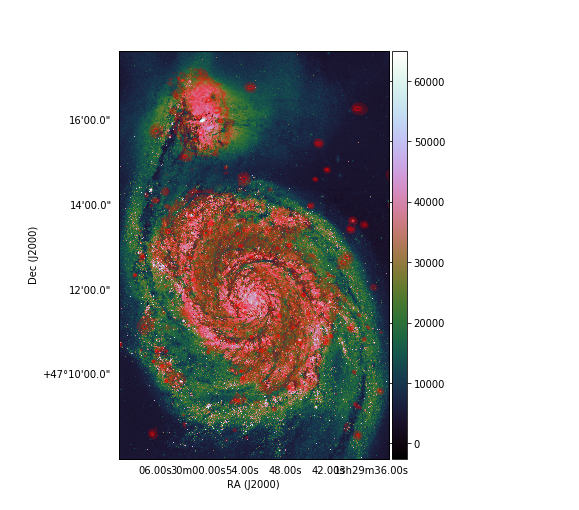

In [22]:
#solution here

sigma = np.std(fits.getdata('m51_xray.fits').flatten())

galaxy = aplpy.FITSFigure('m51_optical_B.fits')
galaxy.show_colorscale(cmap='cubehelix')
galaxy.show_colorbar()
galaxy.show_contour('m51_xray.fits',levels=sigma*(np.arange(9)+1),alpha=0.2,colors='r',kwargs={'linestyle':'--'})